### Import necessary libraries

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

### Set Date values

In [18]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 1825)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

### Get data for the TLRY stock

In [19]:
data = yf.download('TLRY',
                   start = start_date,
                   end = end_date, 
                   progress = False)

data["Date"] = data.index
data = data[["Date", "Open", "High", "Low",
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop = True, inplace = True)
print(data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2019-06-03  38.080002  38.310001  34.250000  34.660000  34.660000  2255600
1 2019-06-04  35.049999  37.189999  34.799999  36.500000  36.500000  1583700
2 2019-06-05  37.630001  37.990002  35.349998  35.590000  35.590000  1078200
3 2019-06-06  35.349998  35.950001  34.299999  35.700001  35.700001   914400
4 2019-06-07  35.990002  38.980000  35.310001  38.799999  38.799999  2578300


### Candlestick chart for the TLRY stock within the dates given above

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



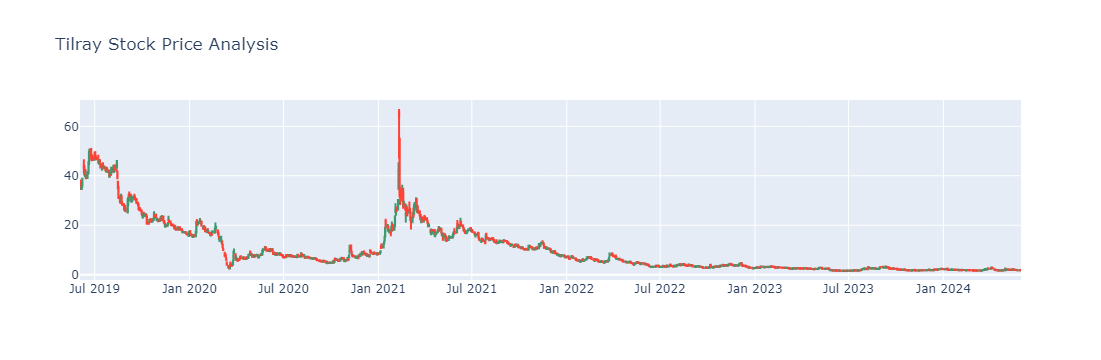

In [20]:
candlestick_chart = go.Figure(data = [go.Candlestick(x = data['Date'],
                                                      open = data['Open'],
                                                      high = data['High'],
                                                      low = data['Low'],
                                                      close = data['Close'])
                                      ]
                              )
candlestick_chart.update_layout(title = 'Tilray Stock Price Analysis',
                                xaxis_rangeslider_visible = False)
candlestick_chart.show()

### Bar Plot

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



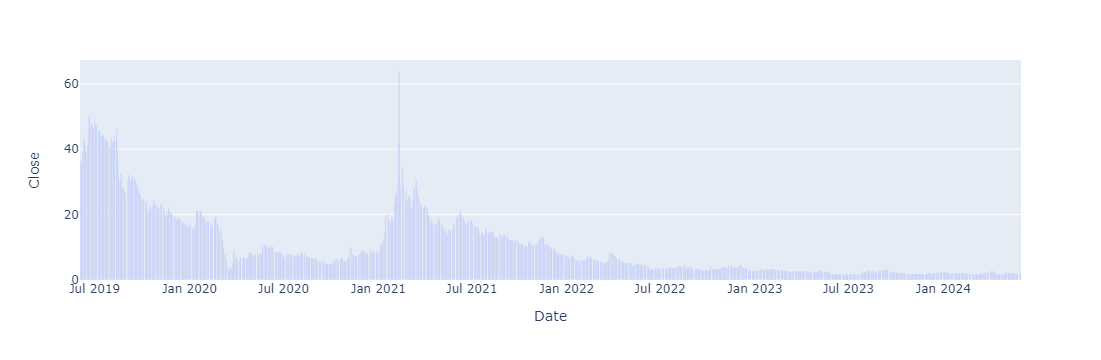

In [21]:
bar_plot = px.bar(data,
                  x = 'Date',
                  y = 'Close')
bar_plot.show()

### Line chart with Range slider

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



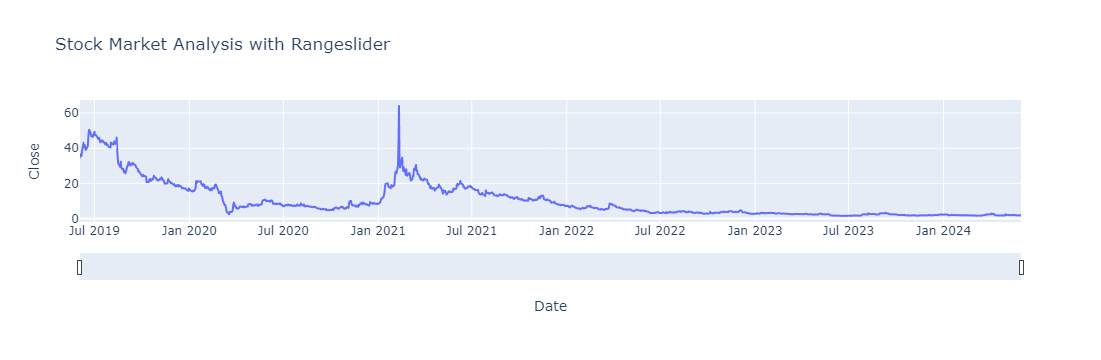

In [22]:
line_chart_slider = px.line(data,
                            x = 'Date',
                            y = 'Close',
                            title = 'Stock Market Analysis with Rangeslider')
line_chart_slider.update_xaxes(rangeslider_visible = True)
line_chart_slider.show()

### Interactive Time Period Selectors

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



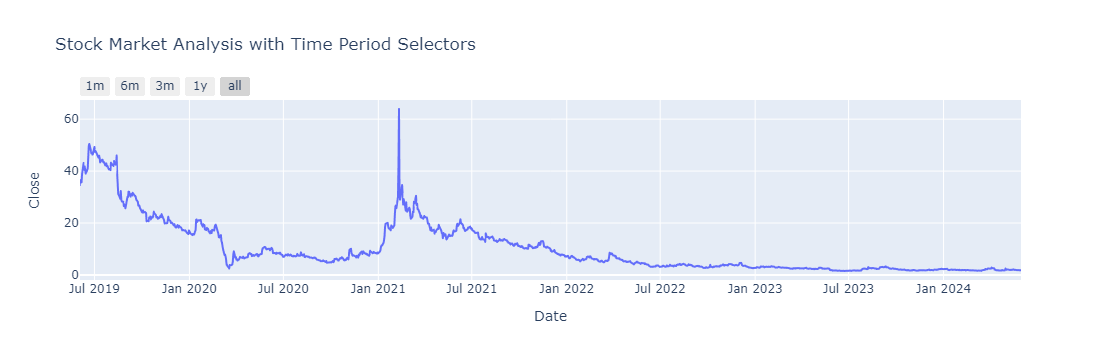

In [23]:
time_selectors = px.line(data, 
                 x = 'Date',
                 y = 'Close',
                 title = 'Stock Market Analysis with Time Period Selectors')

time_selectors.update_xaxes(
    rangeselector = dict(
        buttons = list([
            dict(count = 1, 
                 label = '1m',
                 step = 'month',
                 stepmode = 'backward'),
            dict(count = 6,
                 label = '6m', 
                 step = 'month',
                 stepmode = 'backward'),
            dict(count = 3,
                 label = '3m',
                 step = 'month',
                 stepmode = 'backward'),
            dict(count = 1,
                 label = '1y', 
                 step = 'year',
                 stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

time_selectors.show()

### Scatter plot with Weekend Gaps

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



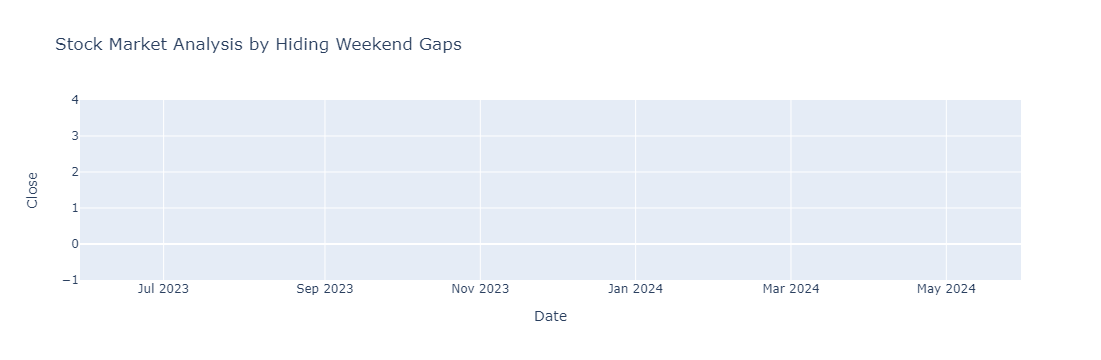

In [24]:
scatter = px.scatter(data, 
                     x = 'Date',
                     y = 'Close',
                     range_x = ['2023-05-30', '2024-05-31'],
                     title = 'Stock Market Analysis by Hiding Weekend Gaps')
scatter.update_xaxes(
    rangebreaks = [
        dict(bounds = ['sat', 'sun'])
    ]
)
scatter.show()